Osnabrück University - Computer Vision (Winter Term 2022/23) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 04: Segmentation

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, December 4th, 2022**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (the exponential function) [0 Points]

This exercise is supposed to be basic (but maybe less familiar than the last one), does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up (again). You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an *exponential function*? How can it be characterized? What is special about $e^x$?

YOUR ANSWER HERE

**b)** How is the exponential function defined for complex arguments? In what way(s) does this generalize the real case?

YOUR ANSWER HERE

**c)** The complex exponential function allows to define a mapping $\mathbb{R}\to\mathbb{C}$ by $x\mapsto e^{ix}$? How does the graph of this mapping look like? Where are the points $e^{2\pi i\frac mn}$ for $m=0,...,n\in\mathbb{N}$ located on this graph?

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Assignment 1: Color perception and color spaces (5 points)

### a) Human color perception

Explain how human color perception works, that is, how light of different frequencies (and mixtures of different frequencies) is perceived as different colors.
Then discuss what light sources/frequencies could be used to induce the perception of the following colors?
* orange
* brown
* purple
* white

The human retina containes two overarching kinds of receptor cells sensitive to light, the rods and the cones. Of these receptor cells rods can distinguish the intensity of light, while cones can distinguish between different frequencies/wavelengths through combination of three different subtypes, one for red light, one for green light and one for blue light THere is some overlap between the color sensitivities especially between the green-sensitive and the red-sensitive cones, both reaching into the yellow.  
Activation of the different cones with differing intensity gives us the ability to see a spectrum of colors in wavelengths between about 380 to 780 nm. At the lower end of this spectrum the light appears violet to the human eye while the top of the spectrum appears red.  

A lightsource for exmple would appear orange if the light it emits had a wavelength of about 590-620 nm and it glowed with a high intensity, would the intensity be lower the object might appear brownish.

For light to appear purple, there could be a mixture of lightwaves with frequencies of about 470 nm (making it blue) and wavelengths of about 700 nm (red).

For a light to appear white there would be light of all wavelengths present, an example of additive mixing.


### b) Additive and subtractive color mixing

Explain the ideas of additive and subtractive color mixing. Name examples for each mixing model and describe technical applications.

In additive mixing one **adds** light of different wavelengths to mix a certain colour. For example if you had a light which appears red and one which appears green, the overlapping areas would appear yellow, this is used in technologies like monitors or lights which opperate on a RGB-basis (**R**ed, **G**reen, **B**lue).  
  
In subtractive colour mixing one makes use of the light-absorption of things, basically subtracting specific wavelengths from a given lightsource. If you had a yellow light for example and held a magenta coloured piece of foil in front of it the remainder of the light passing through the foil would appear red, as the light of this wavelengths is what both colours have in common.  
THis is used in old projectors for example, where different colourd foild were held in front of predominantly white light in order to project images with the remaining light passing through the foil. If you were to add more an more filters theoretically it would be possible to filter all wavelengths, leading to black.

### c) RGB and HSV color space

Compare the RGB and the HSV color spaces. Name advantages and discuss suitable applications for each of them.

As previously stated the RGB colour space is well suited for things like computer screens, as the pixels are self luminous and make use of additive colour mixing. It is however not suited very well to represent things in print, as most colours are not self-luminous and therefore cannot make use of additive colour mixing. Another disadvantage of the RGB space is that it is hard to describe the colour precisely as, although humans technically perceive colours in a similar manner of light-mixtures, it is very hard to impossible to see which wavelengths, and in which ratios, contribute to a specific colour.  
For such things the HSV colour space is more suited, as it is based on the perception and verbal description of colours making it more intuitive.  
It constitutes three parts:  
The **H**ue, which describes the angle on a colour circle with 0° being red, 120° green and 240° blue.  
The **S**aturation, which is the intensity of the colour in percent, 0 being no colour at all, while 100 would be pure colour.  
The **V**alue, which describes the percentage of maximum brightness, 0 being black and 100 being white.  
THe HSV space can be used to more easily describe colours precisely as well as making it easier to mix them. Due to this it is often used in photo editing softwares or digital paining programms.

## Assignment 2: Histogram-based segmentation (5 points)

### a) Histogram-based segmentation

What is histogram-based segmentation? What are it's goals, benefits, and problems?

if we have an image(gray scale), 
1. segmenting it by histogram will be by scanning the image and group similar pixels into regions (contain pixels with similar features).
2. spotting the threshold point on the histogram, threshold point lies between peak of background and peak of object.
3. thresholding taking any pixel near the histogram and set it into 1.

- goal: find suitable threshold

- benefits:
1. simple meaningful representation of image
2. easy to analysis the image
3. locating the objects and the boundries in the image

- problems: 
1. it gives only local threshold, while we need the global one
2. non-uniform brightness distroy the bimodal distribution 

### b) Threshold computation

There exist different methods to automatically determine a threshold for an image. Find at least two that are provided by scikit-image and describe them in more detail. Then apply them to the images `schrift.png` and `pebbles.jpg`.

In [1]:
# Run this cell to get an impression of how the histograms look

%matplotlib inline
import matplotlib.pyplot as plt
from imageio.v3 import imread

img1 = imread('images/schrift.png')
img2 = imread('images/pebbles.jpg') 

plt.figure(figsize=(15, 10)) 
plt.gray()
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(2,2,2)
plt.hist(img1.flatten(), 256, (0, 255))
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(img2)
plt.subplot(2,2,4)
plt.hist(img2.flatten(), 256, (0, 255))
plt.show()

ModuleNotFoundError: No module named 'imageio.v3'

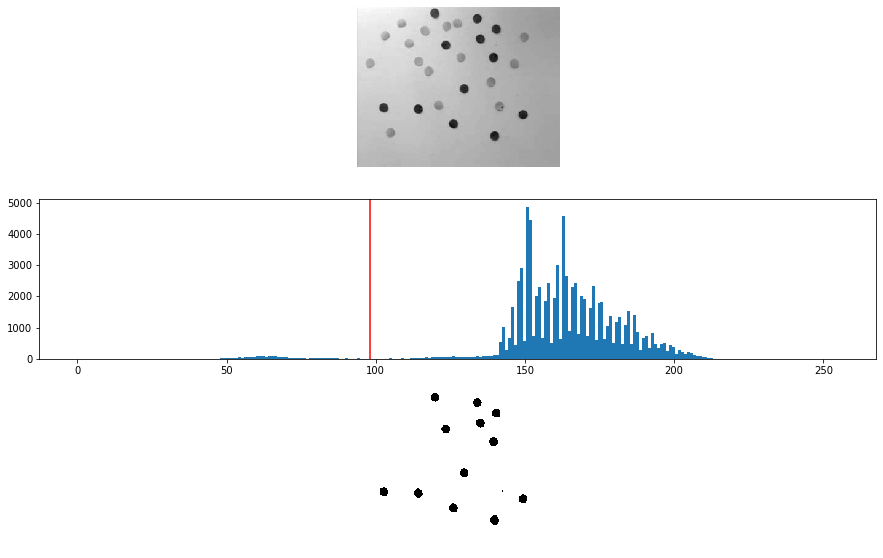

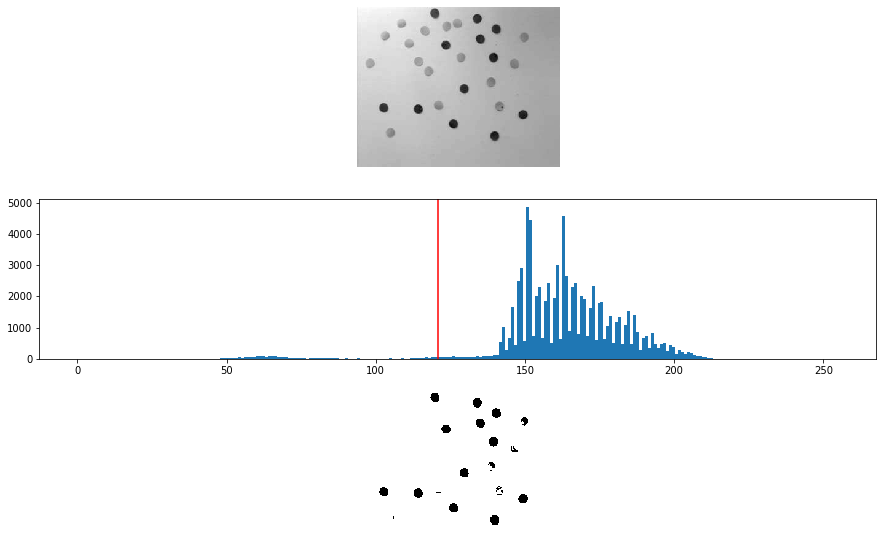

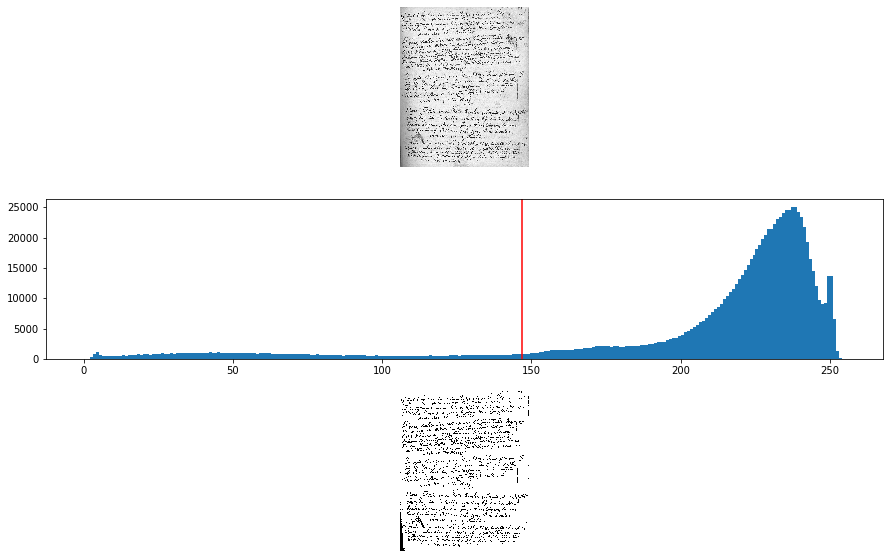

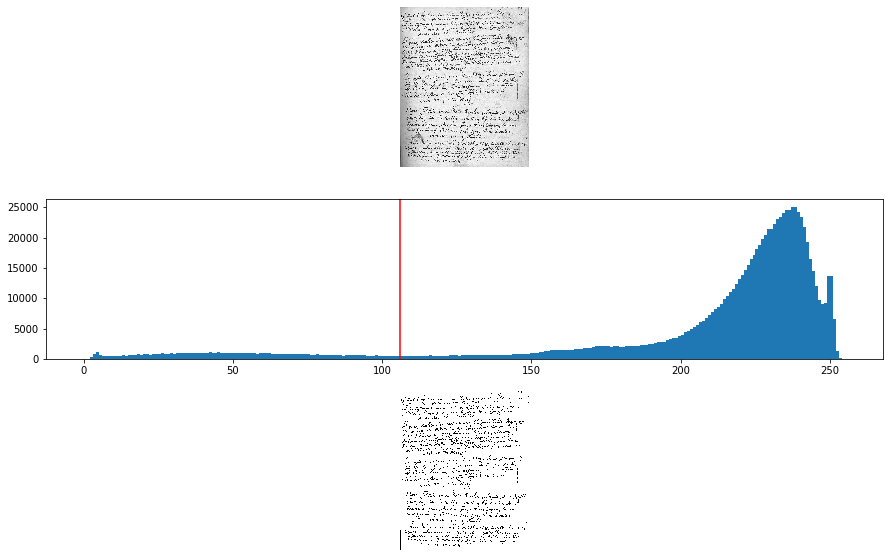

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from imageio import imread
from skimage.filters import threshold_minimum
from skimage.filters import threshold_otsu
from skimage.filters import threshold_mean

img = imread('images/pebbles.jpg') # 'pebbles.jpg' or 'schrift.png'

def abstract_method(self):
    raise NotImplemented

# this function is used for bimodel histogram, this function work on smoothing the histogram of the image until 
#we get in the end two peaks one for the background and the other one for the object in the image.
# the red line represent the threshold value.
thresh_min = threshold_minimum(img)    
segments_min = img > thresh_min

plt.figure(figsize=(15, 10))
plt.gray()
plt.subplot(3,1,1); plt.axis('off'); plt.imshow(img)
plt.subplot(3,1,2); plt.hist(img.flatten(), 256, (0,255))
plt.axvline(thresh_min, color='r')
plt.subplot(3,1,3); plt.axis('off'); plt.imshow(segments_min)



# this filter work on maximizing the variance between two class of pixels and sepret them with the red line which represent the threshold value
thresh_otsu = threshold_otsu(img)    
segments_otsu = img > thresh_otsu

plt.figure(figsize=(15, 10))
plt.gray()
plt.subplot(3,1,1); plt.axis('off'); plt.imshow(img)
plt.subplot(3,1,2); plt.hist(img.flatten(), 256, (0,255))
plt.axvline(thresh_otsu, color='r')
plt.subplot(3,1,3); plt.axis('off'); plt.imshow(segments_otsu)
plt.show()

image = imread('images/schrift.png')

thresh_otsuu = threshold_otsu(image)    
segments_otsuu = image > thresh_otsuu

plt.figure(figsize=(15, 10))
plt.gray()
plt.subplot(3,1,1); plt.axis('off'); plt.imshow(image)
plt.subplot(3,1,2); plt.hist(image.flatten(), 256, (0,255))
plt.axvline(thresh_otsuu, color='r')
plt.subplot(3,1,3); plt.axis('off'); plt.imshow(segments_otsuu)

thresh_minn = threshold_minimum(image)    
segments_minn = image > thresh_minn

plt.figure(figsize=(15, 10))
plt.gray()
plt.subplot(3,1,1); plt.axis('off'); plt.imshow(image)
plt.subplot(3,1,2); plt.hist(image.flatten(), 256, (0,255))
plt.axvline(thresh_minn, color='r')
plt.subplot(3,1,3); plt.axis('off'); plt.imshow(segments_minn)



### c) Shading

Shading may cause a problem to histogram based segmentation. In the lecture (CV-07 slide 13), it was proposed to compute a shading image to deal with that problem. Apply this approach to the images `schrift.png` and `pebbles.jpg`. You may use filter functions from scikit-image for this exercise.

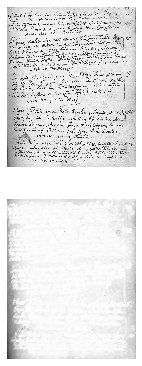

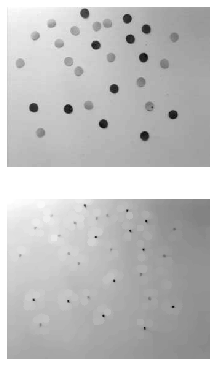

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from skimage.util import img_as_ubyte
from skimage.morphology import disk
from skimage.filters.rank import maximum


img = imread('images/schrift.png').astype(float)/255
img2 = imread('images/pebbles.jpg').astype(float)/255

def abstract_method(self):
    raise NotImplemented
    
image = img_as_ubyte(img)
thresh_min = threshold_minimum(image)    
segments_min = image > thresh_min
shading = maximum (image, disk(6))

image2 = img_as_ubyte(img2)
thresh_otsu = threshold_otsu(image2)    
segments_otsu = image2 > thresh_otsu
shading2 = maximum (image2, disk(6))

plt.figure(figsize=(15, 10))
plt.gray()
plt.subplot(3,1,1); plt.axis('off'); plt.imshow(image)
plt.subplot(3,1,2); plt.axis('off'); plt.imshow(shading)

plt.figure(figsize=(15, 10))
plt.gray()
plt.subplot(3,1,1); plt.axis('off'); plt.imshow(image2)
plt.subplot(3,1,2); plt.axis('off'); plt.imshow(shading2)

plt.show()

## Assignment 3: Pyramid representation (5 points)

**a)** What is the *Gaussian pyramid*? How does the **reduce** operation work? Explain in your own words what low pass filtering is and why it should be used when building the pyramid? Implement the **reduce** operation and generate a figure similar to the one on (CV-07 slide 32).

The image can be represented on multiple scales. When making this with Gaussian filter, it is the Gaussian pyramid. Different scales can be computed by reduce operation, which makes four pixels in level *i* be one pixel in level *i+1*. With reduce operation, level *i+1* will get 1/4 size of level *i*. Before reducing, low pass filtering, Gaussian filter, is required because low pass filtering will make the image smooth so that avoid the pixels of reduced image having artifacts.

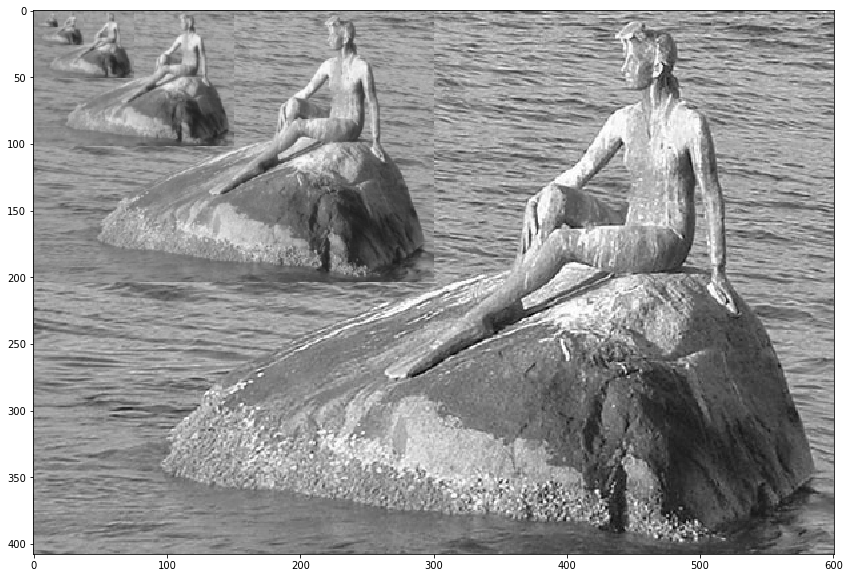

In [3]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from imageio import imread

img = imread('images/mermaid.png')

pyramid_image = img.copy()
binomial_filter = 1/256 * np.asarray([[1, 4, 6, 4, 1],
                                     [4, 16, 24, 16, 4],
                                     [6, 24, 36, 24, 6],
                                     [4, 16, 24, 16, 4],
                                     [1, 4, 6, 4, 1]])
size = img.shape

steps = 5 # number of reduce-iteration
for i in range(steps) :
    # low pass filtering
    filtered_temp = ndimage.convolve(pyramid_image[:size[0],:size[1]], binomial_filter)
    reduced_size = ((size[0]+1)//2, (size[1]+1)//2)
    for x in range(reduced_size[0]) :
        for y in range(reduced_size[1]) :
            temp = np.array(filtered_temp[2*x][2*y])
            if (2*x+1<=size[0]-1) :
                np.append(temp, filtered_temp[2*x+1][2*y])            
                if (2*y+1<=size[1]-1) :
                    np.append(temp, filtered_temp[2*x+1][2*y+1])
            else :
                np.append(temp, filtered_temp[2*x][2*y+1])  
            pyramid_image[x][y] = temp.mean()    
    size = reduced_size
    
plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

**b)** What is the **expand** operation? Why can the **reduce** operation not be inverted? Implement (not using the library function;-) the **expand** operation and generate an image similar to the one on (CV-07 slide 34).

Remark: for producing the final image, do not start with the original image, but with a reduced version.

Expand operation makes the image bigger. If the image of level *i* has M * N size, the image of level *i+1* will get 2M * 2N size. For this operation, we need to interpolate the empty pixel in level *i+1*. Because reduce operation already make the image smaller, it cannot be converted.

In [ ]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from imageio import imread
import cv2

img = imread('images/mermaid.png')
steps = 4

# make image reduced
for i in range(steps) :
    img = cv2.pyrDown(img)

pyramid_image = np.zeros((img.shape[0] * (2 ** steps), img.shape[1] * (2 ** steps)))
pyramid_image[:img.shape[0],:img.shape[1]] = img
binomial_filter = 1/256 * np.asarray([[1, 4, 6, 4, 1],
                                     [4, 16, 24, 16, 4],
                                     [6, 24, 36, 24, 6],
                                     [4, 16, 24, 16, 4],
                                     [1, 4, 6, 4, 1]])

for i in range(steps):
    new_image = np.zeros((img.shape[0]*2, img.shape[1]*2), np.uint8)
    for x in range(img.shape[0]) :
        for y in range(img.shape[1]) :
            new_image[2*x][2*y] = img[x][y]
            new_image[2*x][2*y+1] = img[x][y]
            new_image[2*x+1][2*y] = img[x][y]
            new_image[2*x+1][2*y+1] = img[x][y]

    new_image = ndimage.convolve(new_image, binomial_filter)
    pyramid_image[:img.shape[0],img.shape[1]:new_image.shape[1]] = new_image[:img.shape[0],img.shape[1]:new_image.shape[1]]
    pyramid_image[img.shape[0]:new_image.shape[0],:new_image.shape[1]] = new_image[img.shape[0]:new_image.shape[0],]
    img = new_image


plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

**c)** What is the *Laplacian pyramid*? What is it used for? Compute the Laplacian pyramid and generate an image similar to the one on (CV-07 slide 36).

With Laplacian pyramid, we can check what we lost. To compute it, first reduce the image and expand it again. Then we will get blurred image. Difference between this blurred image and original image is one level of Laplacian pyramid.

In [ ]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from imageio import imread

img = imread('images/mermaid.png')

pyramid_image = np.zeros(img.shape)
binomial_filter = 1/256 * np.asarray([[1, 4, 6, 4, 1],
                                     [4, 16, 24, 16, 4],
                                     [6, 24, 36, 24, 6],
                                     [4, 16, 24, 16, 4],
                                     [1, 4, 6, 4, 1]])
steps = 4 # number of reduce-iteration

for i in range(steps) :
    # low pass filtering
    filtered_temp = ndimage.convolve(img, binomial_filter)
    # reduce(image)
    reduced_image = np.zeros(((img.shape[0]+1)//2, (img.shape[1]+1)//2), np.uint8)
    for x in range((img.shape[0]+1)//2) :
        for y in range((img.shape[1]+1)//2) :
            temp = np.array(filtered_temp[2*x][2*y])
            if (2*x+1<=img.shape[0]-1):
                np.append(temp, filtered_temp[2*x+1][2*y])            
                if (2*y+1<=img.shape[1]-1) :
                    np.append(temp, filtered_temp[2*x+1][2*y+1])
            else :
                np.append(temp, filtered_temp[2*x][2*y+1])  
            reduced_image[x][y] = temp.mean()
    # expand(reduce(image))
    exp_red_image = np.zeros((reduced_image.shape[0]*2, reduced_image.shape[1]*2), np.uint8)
    for x in range(reduced_image.shape[0]) : 
        for y in range(reduced_image.shape[1]) :
            exp_red_image[2*x][2*y] = reduced_image[x][y]
            exp_red_image[2*x][2*y+1] = reduced_image[x][y]
            exp_red_image[2*x+1][2*y] = reduced_image[x][y]
            exp_red_image[2*x+1][2*y+1] = reduced_image[x][y]
    # smoothing
    exp_red_image = ndimage.convolve(exp_red_image, binomial_filter)
    laplace = exp_red_image[:img.shape[0], :img.shape[1]] - img[:img.shape[0], :img.shape[1]]
    pyramid_image[:laplace.shape[0],:laplace.shape[1]] = laplace
    img = reduced_image

plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

## Assignment 4: Region merging (5 points)

Implement the *region merging* algorithm (CV-07 slide 39) and apply it to the image `segments.png` (or some part of it). Use a simple *homogeneity condition*, e.g. that the maximal difference between gray values in a segment is not larger than a given threshold.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread


img = imread('./images/segments.png', pilmode='L')
# Choosing a large image region lengthens computation time
img = img[64:128,64:128]
threshold = 50

# compute the `label` array by implementing "region merging"
label = np.empty(img.shape, np.int8)
trial = 500
while (trial) :
    for x in range(img.shape[0]) :
        for y in range(img.shape[1]) :
            if (x-1>0) :
                if abs(img[x,y]-img[x-1,y]) < threshold:
                    if not label[x,y]:
                        label[x,y] = img[x,y]
                    label[x-1,y] = label[x,y]
            if (y-1>0) :
                if abs(img[x,y]-img[x,y-1]) < threshold:
                    if not label[x,y]:
                        label[x,y] = img[x,y]
                    label[x,y-1] = label[x,y]
            if (y+1<img.shape[1]-1) :
                if abs(img[x,y]-img[x,y+1]) < threshold:
                    if not label[x,y]:
                        label[x,y] = img[x,y]
                    label[x,y+1] = label[x,y]
            if (x+1<img.shape[0]-1) :
                if abs(img[x,y]-img[x+1,y]) < threshold:
                    if not label[x,y]:
                        label[x,y] = img[x,y]
                    label[x+1,y] = label[x,y]
    trial -= 1;
    
plt.figure(figsize=(12, 12))
plt.gray()
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(label, cmap='prism')
plt.show()